# Chapter 19 Exercise Solutions

## 4. Bisection Method Function

Write a function `my_bisection(f, a, b, tol)` that returns `[R, E]`, where:

* `f` is a function object.
* `a` and `b` are scalars such that `a < b`.
* `tol` is a strictly positive scalar value.

The function should:

* Return an array `R`, where `R[i]` is the estimation of the root of `f` defined by `(a + b) / 2` for the `i`th iteration of the bisection method. Include the initial estimate.
* Return an array `E`, where `E[i]` is the value of `|f(R[i])|` for the `i`th iteration of the bisection method.
* Terminate when `E[i] < tol`.
* Assume that `sign(f(a)) != sign(f(b))`.

**Clarification:** The input `a` and `b` constitute the first iteration of bisection; therefore, `R` and `E` should never be empty.

In [1]:
import numpy as np
def my_bisection(f, a, b, tol):
    if np.sign(f(a)) == np.sign(f(b)):
        raise ValueError("f(a) and f(b) must have opposite signs")

    R = []  # Stores root estimates
    E = []  # Stores error estimates

    while True:
        c = (a + b) / 2  
        R.append(c)
        E.append(abs(f(c)))  

        if E[-1] < tol:  
            break

        if np.sign(f(a)) != np.sign(f(c)):
            b = c
        else:
            a = c

    return R, E  

f = lambda x: x**2 - 2
[R, E] = my_bisection(f, 0, 2, 1e-1)
print(R)
print(E)

[1.0, 1.5, 1.25, 1.375, 1.4375]
[1.0, 0.25, 0.4375, 0.109375, 0.06640625]


## 5. Newton-Raphson Method Function

Write a function `my_newton(f, df, x0, tol)` that returns `[R, E]`, where:

* `f` is a function object.
* `df` is a function object representing the derivative of `f`.
* `x0` is an initial estimation of the root.
* `tol` is a strictly positive scalar.

The function should:

* Return an array `R`, where `R[i]` is the Newton-Raphson estimate of the root of `f` for the `i`th iteration. Include the initial estimate.
* Return an array `E`, where `E[i]` is the value of `|f(R[i])|` for the `i`th iteration of the Newton-Raphson method.
* Terminate when `E[i] < tol`.
* Assume that the derivative of `f` will not be zero during any iteration for any of the test cases given.

In [2]:
def my_newton(f, df, x0, tol):
    R = [x0]  
    E = [abs(f(x0))]  

    while E[-1] >= tol:  
        x_next = R[-1] - f(R[-1]) / df(R[-1])  
        R.append(x_next)
        E.append(abs(f(x_next)))  

    return R, E 

f = lambda x: x**2 - 2
df = lambda x: 2*x
[R, E] = my_newton(f, df, 1, 1e-5)
print(R)
print(E)

[1, 1.5, 1.4166666666666667, 1.4142156862745099]
[1, 0.25, 0.006944444444444642, 6.007304882871267e-06]


# Chapter 20 Exercise Solutions

## 1. Numerical Derivative Calculation

Write a function `my_der_calc(f, a, b, N, option)` that computes numerical derivatives of a function `f(x)` over the interval `[a, b]` using `N` evenly spaced points. The function should return `[df, X]`, where `df` is the array of numerical derivatives and `X` is the array of corresponding x-values where the derivatives are valid.

The `option` argument determines the method used for derivative calculation:

-   `"forward"`: Forward difference method.
-   `"backward"`: Backward difference method.
-   `"central"`: Central difference method.

Note that each method "loses" points at the boundaries:

-   Forward difference: Loses the last point.
-   Backward difference: Loses the first point.
-   Central difference: Loses both the first and last points.

In [4]:
import numpy as np

def my_der_calc(f, a, b, N, option):
    """
    Computes numerical derivatives of a function f(x).

    Args:
        f: The function object.
        a: The start of the interval.
        b: The end of the interval.
        N: The number of evenly spaced points.
        option: The derivative method ("forward", "backward", or "central").

    Returns:
        A tuple (df, X), where df is the array of derivatives and X is the array of x-values.

    Raises:
        ValueError: If N <= 10 or if the option is invalid.
    """
    if N <= 10:
        raise ValueError("N must be greater than 10.")

    x = np.linspace(a, b, N)
    y = f(x)

    h = x[1] - x[0]
    df = []
    X = []

    if option == "forward":
        df = (y[1:] - y[:-1]) / h
        X = x[:-1]

    elif option == "backward":
        df = (y[1:] - y[:-1]) / h
        X = x[1:]

    elif option == "central":
        df = (y[2:] - y[:-2]) / (2 * h)
        X = x[1:-1]

    else:
        raise ValueError("Invalid option. Choose 'forward', 'backward', or 'central'.")

    return df, X

# Example usage:
f = lambda x: np.sin(x)
a, b, N = 0, np.pi, 20

df_forward, X_forward = my_der_calc(f, a, b, N, "forward")
df_backward, X_backward = my_der_calc(f, a, b, N, "backward")
df_central, X_central = my_der_calc(f, a, b, N, "central")

print("Forward Difference:", df_forward)
print("Backward Difference:", df_backward)
print("Central Difference:", df_central)

Forward Difference: [ 0.99544962  0.96829635  0.91473048  0.83621315  0.7348861   0.61351327
  0.4754054   0.32432971  0.16440716  0.         -0.16440716 -0.32432971
 -0.4754054  -0.61351327 -0.7348861  -0.83621315 -0.91473048 -0.96829635
 -0.99544962]
Backward Difference: [ 0.99544962  0.96829635  0.91473048  0.83621315  0.7348861   0.61351327
  0.4754054   0.32432971  0.16440716  0.         -0.16440716 -0.32432971
 -0.4754054  -0.61351327 -0.7348861  -0.83621315 -0.91473048 -0.96829635
 -0.99544962]
Central Difference: [ 0.98187299  0.94151341  0.87547181  0.78554962  0.67419968  0.54445934
  0.39986756  0.24436844  0.08220358 -0.08220358 -0.24436844 -0.39986756
 -0.54445934 -0.67419968 -0.78554962 -0.87547181 -0.94151341 -0.98187299]


# Chapter 21 Exercise Solutions

## 5. Fourier Series Coefficients and Approximation

Write a function `my_fourier_coef(f, n)` that calculates the Fourier coefficients $A_n$ and $B_n$ for a given $2\pi$-periodic function $f(x)$. The Fourier series representation is:

$$f(x) = \frac{A_0}{2} + \sum_{n=1}^{\infty} A_n \cos(nx) + B_n \sin(nx)$$

where:

$$A_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(nx) \, dx$$

$$B_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin(nx) \, dx$$

Use `scipy.integrate.quad` for numerical integration.

Additionally, create a function `plot_results(f, N)` that plots the original function $f(x)$ and its Fourier series approximation up to the $N$-th term. This will help visualize how well the truncated series approximates the function.

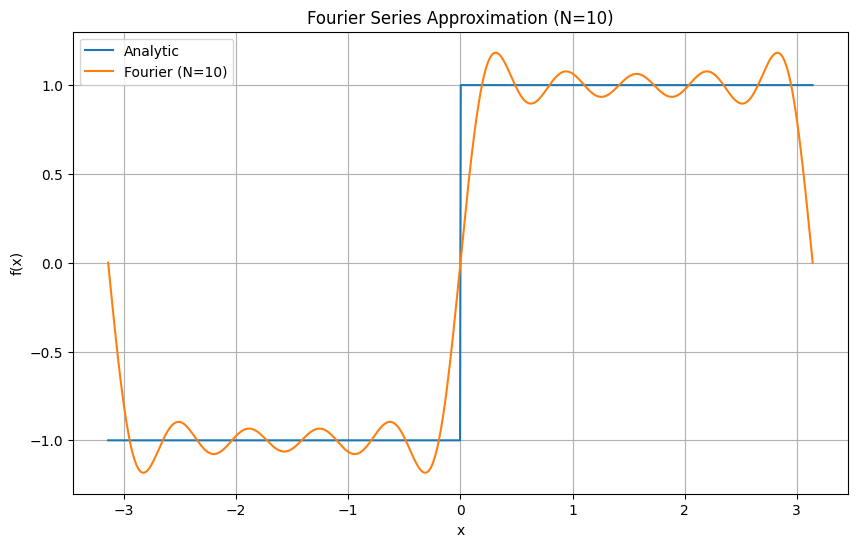

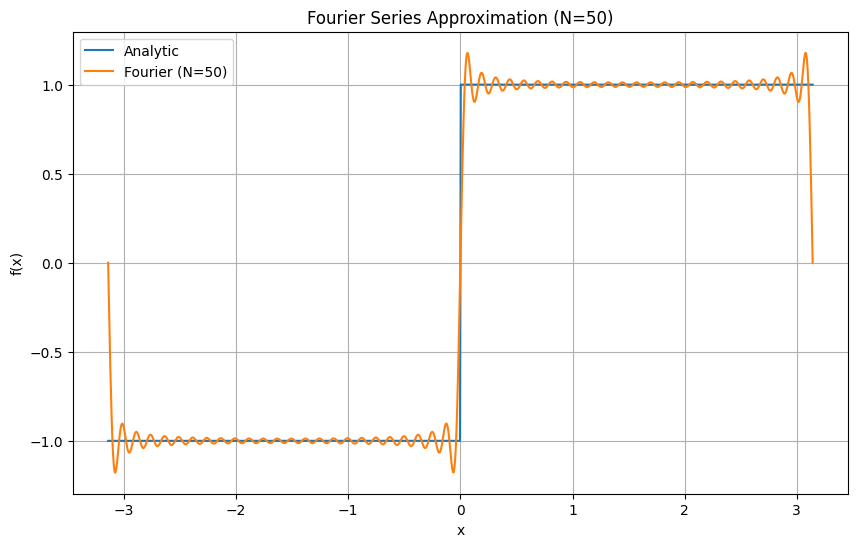

In [3]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

def my_fourier_coef(f, n):
    """
    Calculates the nth Fourier coefficients An and Bn.

    Args:
        f: A 2pi-periodic function object.
        n: The coefficient index.

    Returns:
        A tuple (An, Bn).
    """
    An, _ = spi.quad(lambda x: f(x) * np.cos(n * x), -np.pi, np.pi)
    Bn, _ = spi.quad(lambda x: f(x) * np.sin(n * x), -np.pi, np.pi)
    return An / np.pi, Bn / np.pi

def plot_results(f, N):
    """
    Plots the original function and its Fourier series approximation.

    Args:
        f: A 2pi-periodic function object.
        N: The number of terms to include in the Fourier series.
    """
    x = np.linspace(-np.pi, np.pi, 1000)  # Reduced points for faster plotting
    A0, _ = my_fourier_coef(f, 0)
    y_approx = A0 / 2 * np.ones_like(x)

    for n in range(1, N + 1):
        An, Bn = my_fourier_coef(f, n)
        y_approx += An * np.cos(n * x) + Bn * np.sin(n * x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, f(x), label="Analytic")
    plt.plot(x, y_approx, label=f"Fourier (N={N})")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(f"Fourier Series Approximation (N={N})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
def square_wave(x):
    return np.where(x > 0, 1, -1)

plot_results(square_wave, 10)
plot_results(square_wave, 50)

# Chapter 22 Exercise Solutions

## 3. Lorenz Equations Solver

Write a function `my_lorenz_solver(t_span, s0, sigma, rho, beta)` that solves the Lorenz equations using `scipy.integrate.solve_ivp`. The function should return `[T, X, Y, Z]`, where:

-   `t_span`: A list `[t0, tf]` representing the initial and final times.
-   `s0`: A 3D array `[x0, y0, z0]` representing the initial position.
-   `sigma`, `rho`, `beta`: Scalar parameters of the Lorenz system.
-   `T`: An array of times from the `solve_ivp` output.
-   `X`, `Y`, `Z`: Numerically integrated solutions.

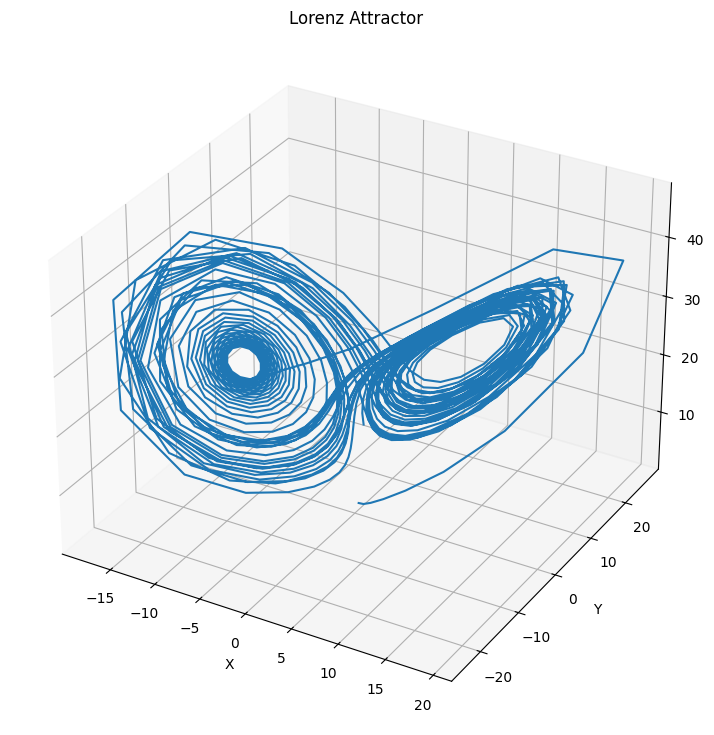

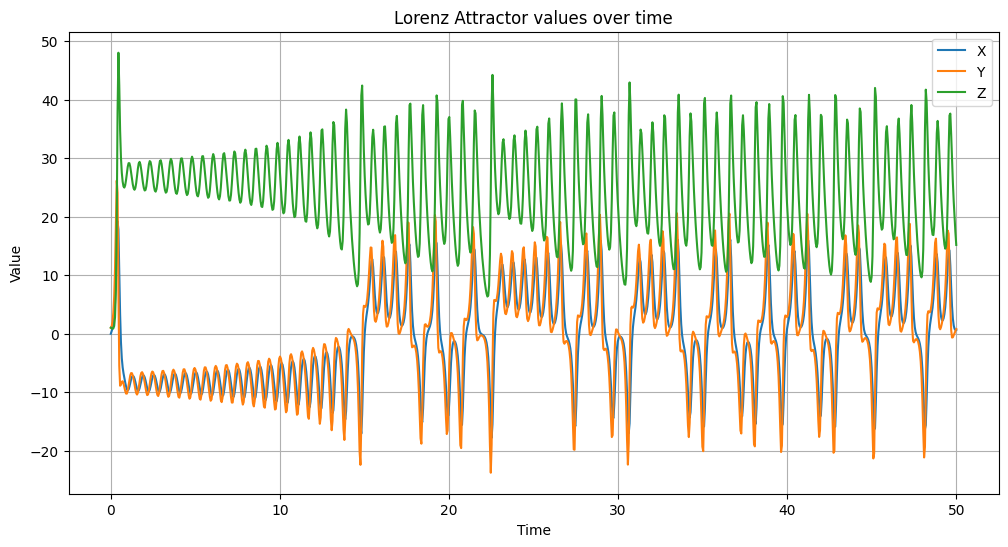

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def my_lorenz_solver(t_span, s0, sigma, rho, beta):
    """
    Solves the Lorenz equations using solve_ivp.

    Args:
        t_span: A list [t0, tf] representing the time span.
        s0: A 3D array [x0, y0, z0] representing the initial position.
        sigma: The sigma parameter.
        rho: The rho parameter.
        beta: The beta parameter.

    Returns:
        A list [T, X, Y, Z] containing the solution.
    """
    def lorenz(t, s):
        x, y, z = s
        dxdt = sigma * (y - x)
        dydt = x * (rho - z) - y
        dzdt = x * y - beta * z
        return [dxdt, dydt, dzdt]
    
    sol = solve_ivp(lorenz, t_span, s0, t_eval=np.linspace(t_span[0], t_span[1], 1000))
    
    T = sol.t
    X, Y, Z = sol.y
    
    return [T, X, Y, Z]

# Example usage:
sigma = 10
rho = 28
beta = 8/3
t0 = 0
tf = 50
s0 = np.array([0, 1, 1.05])

[T, X, Y, Z] = my_lorenz_solver([t0, tf], s0, sigma, rho, beta)

# Plotting the results
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection='3d')
ax.plot(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()

#Plotting X, Y, Z over time.
plt.figure(figsize=(12, 6))
plt.plot(T,X, label = 'X')
plt.plot(T,Y, label = 'Y')
plt.plot(T,Z, label = 'Z')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Lorenz Attractor values over time")
plt.legend()
plt.grid(True)
plt.show()